# Exploratory Data Analysis: Stack Overflow Developer Survey 2023

This project explores developer skills and work patterns based on the 2023 Stack Overflow Developer Survey.  
The goal is to gain insights into commonly used programming languages, differences across age groups,
remote work adoption, and role distributions among respondents.

## 1. Data Source

The dataset used in this analysis is the official **Stack Overflow Developer Survey 2023**.
It contains self-reported responses from tens of thousands of developers worldwide.

- survey_results_public.csv: main dataset
- survey_results_schema.csv: description of survey questions
- so_survey_2023.pdf: original questionnaire and methodology

## 2. Research Questions

This analysis focuses on the following questions:

1. Which programming languages are most commonly used by developers?
2. How do programming language skills vary by age group?
3. How prevalent is remote work among developers?
4. Are there differences between respondent roles?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
plt.style.use("seaborn-v0_8")

## 3. Data Loading

The dataset is loaded using pandas. Display settings are adjusted for better readability.

In [5]:
df = pd.read_csv("../data/survey_results_public.csv")

schema = pd.read_csv("../data/survey_results_schema.csv")

## 4. Data Understanding

Before analyzing the data, we explore the structure of the dataset, available columns,
and the meaning of key variables using the provided schema.


In [6]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [11]:
schema.head(10)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


## 5. Data Cleaning and Preparation

Instead of cleaning the entire dataset, this analysis focuses on a subset of relevant variables
that directly answer the research questions.

Missing values are handled on a per-analysis basis rather than globally removing rows.


In [ ]:
cols = [
    "LanguageHaveWorkedWith",
    "Age",
    "RemoteWork",
    "Employment",
    "MainBranch"
]

df_work = df[cols].copy()
df_work.head()

,LanguageHaveWorkedWith,Age,RemoteWork,Employment,MainBranch
0,NaN,18-24 years old,NaN,NaN,None of these
1,HTML/CSS;JavaScript;Python,25-34 years old,Remote,"Employed, full-time",I am a developer by profession
2,Bash/Shell (all shells);Go,45-54 years old,"Hybrid (some remote, some in-person)","Employed, full-time",I am a developer by profession
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,25-34 years old,"Hybrid (some remote, some in-person)","Employed, full-time",I am a developer by profession
4,HTML/CSS;JavaScript;TypeScript,25-34 years old,Remote,"Employed, full-time;Independent contractor, fr...",I am a developer by profession


To understand data quality for our selected variables, we calculate the missing-value rate per column.

In [16]:
df_work.isna().mean().sort_values(ascending=False)

RemoteWork                0.172385
LanguageHaveWorkedWith    0.022919
Employment                0.014420
Age                       0.000000
MainBranch                0.000000
dtype: float64

## 6. Analysis

The following sections answer the research questions using the prepared subset of variables.

### 6.1 Most Commonly Used Programming Languages

This section analyzes which programming languages developers reported using in the past year.
Multiple responses per participant are handled by splitting and exploding the data.


In [ ]:
df_lang = df_work[["LanguageHaveWorkedWith"]].dropna()

In [19]:
languages = (
    df_lang["LanguageHaveWorkedWith"]
    .str.split(";")
    .explode()
)

In [ ]:
language_counts = languages.value_counts()
language_counts.head(10)

LanguageHaveWorkedWith
JavaScript                 55711
HTML/CSS                   46396
Python                     43158
SQL                        42623
TypeScript                 34041
Bash/Shell (all shells)    28351
Java                       26757
C#                         24193
C++                        19634
C                          16940
Name: count, dtype: int64

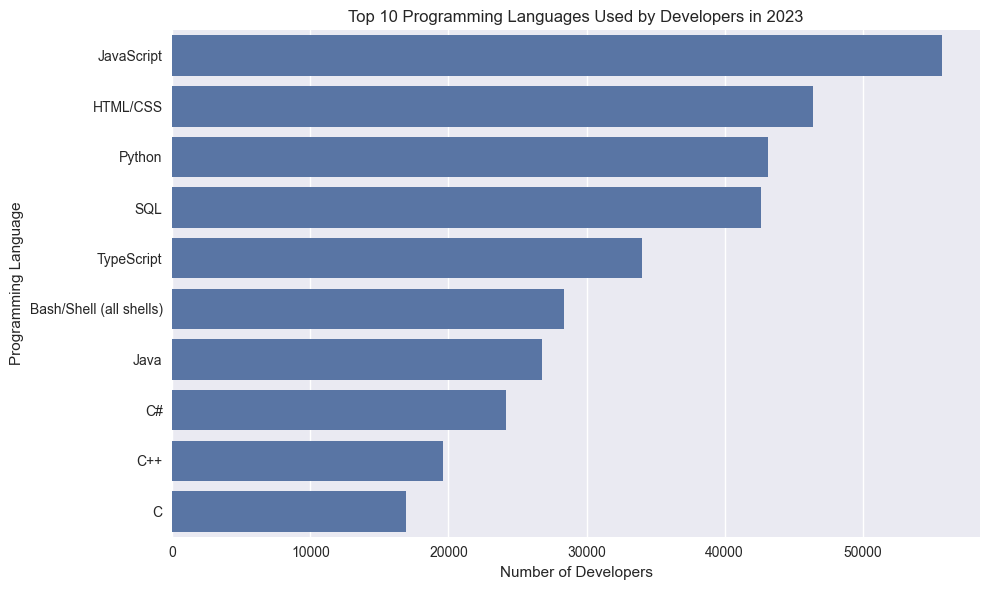

In [ ]:
top_languages = language_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_languages.values,
    y=top_languages.index
)

plt.title("Top 10 Programming Languages Used by Developers in 2023")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")

plt.tight_layout()
plt.show()

**Interpretation:** The results highlight the most commonly used languages among respondents in 2023.
This provides a baseline for comparing technology usage across age groups and roles.

### 6.2 Programming Languages by Age Group

This section explores how programming language usage differs across age groups.
The analysis focuses on the top 10 most commonly used languages.


In [ ]:
df_age_lang = df_work[
    ["Age", "LanguageHaveWorkedWith"]
].dropna()

df_age_lang.head()

,Age,LanguageHaveWorkedWith
1,25-34 years old,HTML/CSS;JavaScript;Python
2,45-54 years old,Bash/Shell (all shells);Go
3,25-34 years old,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4,25-34 years old,HTML/CSS;JavaScript;TypeScript
5,35-44 years old,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...


In [ ]:
df_age_lang = (
    df_age_lang
    .assign(Language=df_age_lang["LanguageHaveWorkedWith"].str.split(";"))
    .explode("Language")
)

df_age_lang.head()

,Age,LanguageHaveWorkedWith,Language
1,25-34 years old,HTML/CSS;JavaScript;Python,HTML/CSS
1,25-34 years old,HTML/CSS;JavaScript;Python,JavaScript
1,25-34 years old,HTML/CSS;JavaScript;Python,Python
2,45-54 years old,Bash/Shell (all shells);Go,Bash/Shell (all shells)
2,45-54 years old,Bash/Shell (all shells);Go,Go


In [ ]:
age_language_counts = (
    df_age_lang
    .groupby(["Age", "Language"])
    .size()
    .reset_index(name="Count")
)

age_language_counts.head()

,Age,Language,Count
0,18-24 years old,APL,67
1,18-24 years old,Ada,124
2,18-24 years old,Apex,88
3,18-24 years old,Assembly,1902
4,18-24 years old,Bash/Shell (all shells),5632


In [ ]:
top_10_languages = language_counts.head(10).index

filtered = age_language_counts[
    age_language_counts["Language"].isin(top_10_languages)
]

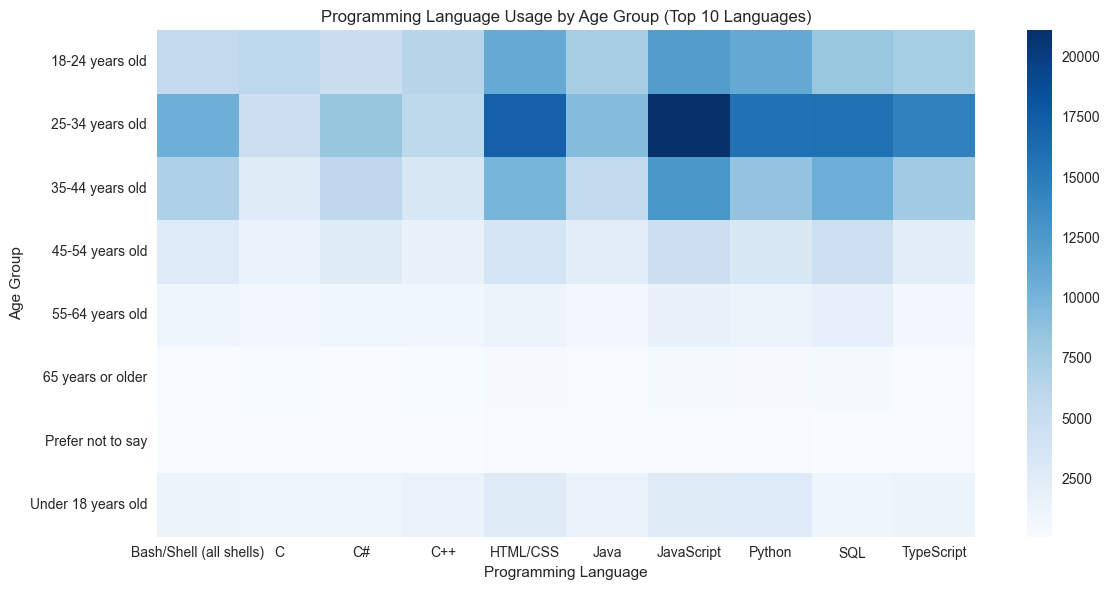

In [ ]:
pivot = filtered.pivot(
    index="Age",
    columns="Language",
    values="Count"
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    cmap="Blues"
)

plt.title("Programming Language Usage by Age Group (Top 10 Languages)")
plt.xlabel("Programming Language")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

**Interpretation:** Language usage varies across age groups. The heatmap makes it easy to spot which
languages are relatively more common in younger vs. older respondent groups.

### 6.3 Remote Work Distribution

This section examines how prevalent remote, hybrid, and in-person work arrangements are among respondents.


In [ ]:
df_remote = df_work[["RemoteWork"]].dropna()
df_remote.head()

,RemoteWork
1,Remote
2,"Hybrid (some remote, some in-person)"
3,"Hybrid (some remote, some in-person)"
4,Remote
5,Remote


In [33]:
remote_counts = df_remote["RemoteWork"].value_counts()
remote_counts

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

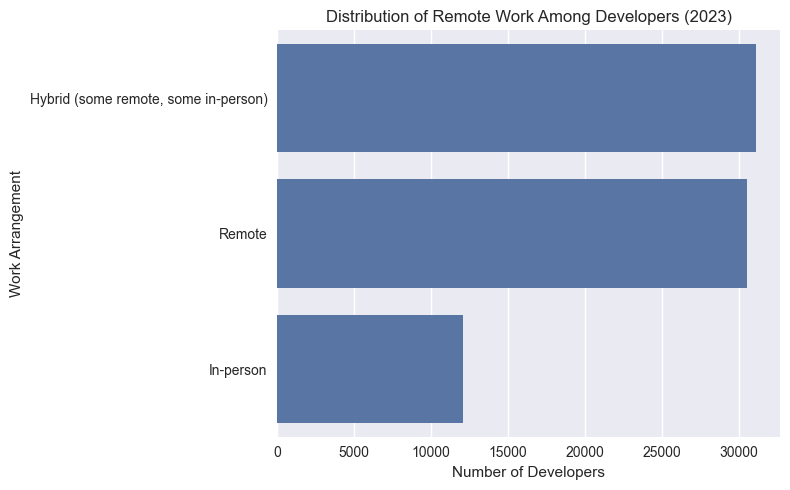

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=remote_counts.values,
    y=remote_counts.index
)

plt.title("Distribution of Remote Work Among Developers (2023)")
plt.xlabel("Number of Developers")
plt.ylabel("Work Arrangement")
plt.tight_layout()
plt.show()

**Interpretation:** Remote and hybrid work appear widely adopted among respondents.
Note that this question is optional, which explains the higher missing-value rate.


### 6.4 Differences Between Roles

This section analyzes the distribution of respondent roles to understand which groups are most represented
in the survey.


In [ ]:
df_roles = df_work[["MainBranch"]].dropna()
df_roles.head()

,MainBranch
0,None of these
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession


In [ ]:
role_counts = df_roles["MainBranch"].value_counts()
role_counts

MainBranch
I am a developer by profession                                                           67237
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I am learning to code                                                                     4961
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1211
Name: count, dtype: int64

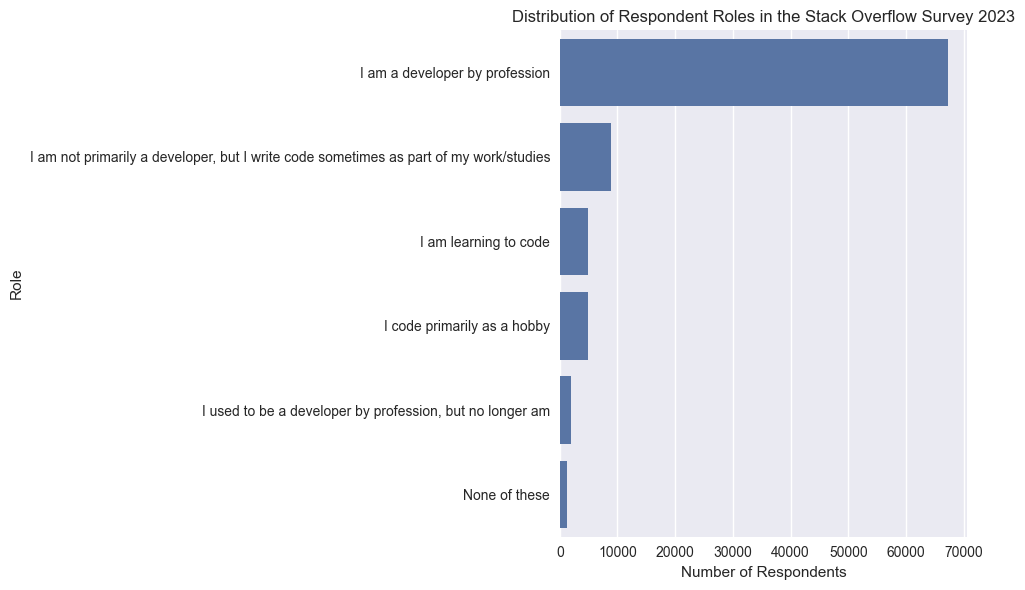

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=role_counts.values,
    y=role_counts.index
)

plt.title("Distribution of Respondent Roles in the Stack Overflow Survey 2023")
plt.xlabel("Number of Respondents")
plt.ylabel("Role")
plt.tight_layout()
plt.show()

**Interpretation:** The dataset is dominated by professional developers, followed by students/learners.
This composition should be considered when generalizing the findings.

## Key Insights

- Python, JavaScript, and SQL are the most commonly used programming languages.
- Programming language usage shows noticeable variation across age groups.
- Remote and hybrid work arrangements are widely adopted.
- The survey primarily represents professional developers, followed by students and learners.


## Limitations

- The survey data is self-reported and subject to response bias.
- Not all questions were mandatory, resulting in missing values.
- Results describe correlations and distributions, not causal relationships.


## Conclusion

This exploratory analysis provides insights into developer skills and work patterns in 2023.  
The results highlight current technology trends and workplace dynamics while acknowledging
the limitations of survey-based data.
